<a href="https://colab.research.google.com/github/Muhammad-Taufiq-Khan/DeepLearningResearchIntern-PuchoLifeSciencesInc/blob/main/Taufiqul_Haque_Khan_Tusar_(Deep_Learning_Research_internship).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dependencies and Dataset

In [1]:
#Importing Dependencies----

#Path maintaining
from os import path
 
#Data Manipulation 
import numpy as np
import pandas as pd
 
#Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns 
sns.set_style("white")
sns.set_style("ticks")
 
import plotly.express as px 
 
#For Neural Network
from keras.models import Sequential
from keras.layers import Dense
 
#Encoding 
from keras.utils import np_utils 
from sklearn.preprocessing import LabelEncoder
 
#Model Building and Evaluation
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
 #Loading Dataset
 
 
 #collapse
# import some packages
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 10, 2020
@author: neeks, cmu
"""
 

# urls for csvs
# url_metadata_annotations = 'https://raw.githubusercontent.com/iiscleap/Coswara-Exp/master/Annotated_v2/Annotated_v2_ans.csv'
url_metadata_recordings = 'https://raw.githubusercontent.com/iiscleap/Coswara-Data/master/combined_data.csv'
 
# path_audio_data = '/Volumes/BackupNeeks/dBase/coswaradBase/annotatedFiles/audio_19Oct2020/'
path_store_figure = './figures/'
fig_save = 0
 
# load the csvs
df_2 = pd.read_csv(url_metadata_recordings) # recording metadata

# Exploratory Data Analysis

In [3]:
#Null Values
print("1. Null values per atribute")
print(df_2.isnull().sum())
print('\n')

#Unique Values
print("2. Unique values per atribute")
for col in df_2.columns:
  print(col,":",len(df_2[col].unique()))
print('\n')

#Data type
print("3. Data types of atributes")
print(df_2.dtypes)
print('\n')

#Dataframe
print("4. Top 3 records")
df_2.head(3)

1. Null values per atribute
id                    0
a                     0
covid_status          0
ep                    0
g                     0
l_c                   0
l_l                 231
l_s                   0
rU                  680
smoker             1660
cold               1783
ht                 1816
diabetes           1825
fever              1809
asthma             1874
um                 1038
cough              1702
ihd                1936
bd                 1871
st                 1853
ftg                1838
mp                 1860
loss_of_smell      1884
cld                1939
test_status        1413
diarrhoea          1932
pneumonia          1936
ctScan             1783
testType           1810
test_date          1810
vacc               1783
ctDate             1921
ctScore            1921
others_resp        1945
others_preexist    1933
dtype: int64


2. Unique values per atribute
id : 1947
a : 78
covid_status : 7
ep : 2
g : 3
l_c : 48
l_l : 662
l_s : 142
rU : 3
smok

,id,a,covid_status,ep,g,l_c,l_l,l_s,rU,smoker,cold,ht,diabetes,fever,asthma,um,cough,ihd,bd,st,ftg,mp,loss_of_smell,cld,test_status,diarrhoea,pneumonia,ctScan,testType,test_date,vacc,ctDate,ctScore,others_resp,others_preexist
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,y,male,India,Anantapur,Andhra Pradesh,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,y,male,India,BENGALURU URBAN,Karnataka,n,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,y,female,United States,Pittsburgh,Pennsylvania,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


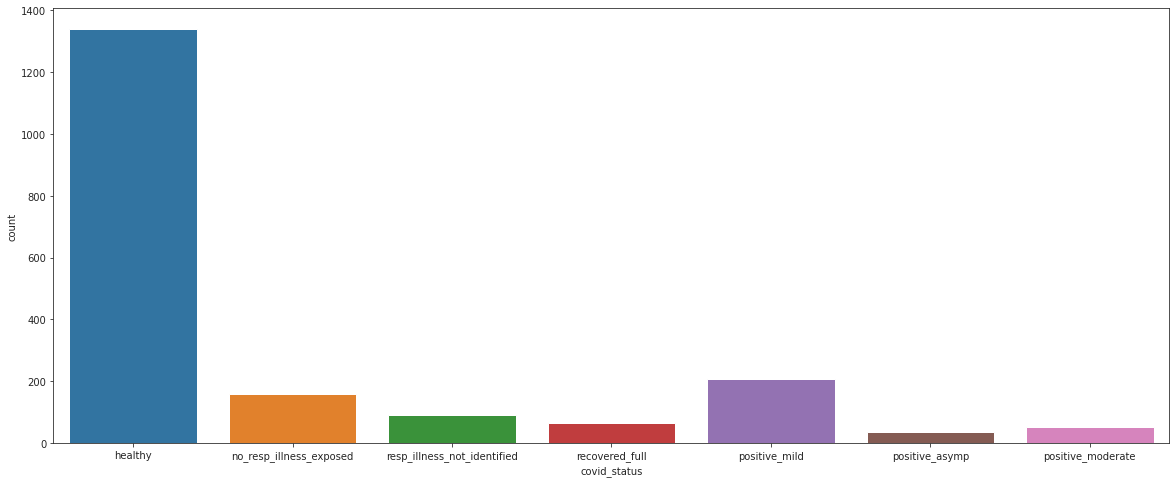

In [4]:
#Bar Chart of Covid status
dimention = (20.00, 8.00)
fig, ax = plt.subplots(figsize = dimention)
sns.countplot("covid_status", ax = ax, data = df_2)

In [5]:
#Pie Chart of Covid status
covid_status_pie_chart = px.pie(df_2, names = "covid_status")
covid_status_pie_chart.show()

#Feature Engineering

*   Selected attributes with fewer missing data.
*   Selected attributes are age, gender, located country, located state, and covid status respectively. 
*   converted every string record into lower case to avoid case sensitiveness.


In [6]:
selected_columns = df_2[["a","g","l_c","l_s","covid_status"]]
df = selected_columns.copy()

#Converting all the string valus into lowercase
df = df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x) 

*   used the map function to transform multi-class labels into binary classes.

In [7]:
# Map alphabetical label into neumerical label
df["covid_status"]= df["covid_status"].map({'healthy':0,'positive_mild':1,'no_resp_illness_expoed':0,'resp_illness_not_identified':0,'recovered_full':0,'positive_moderate':1,'positive_asymp':1})


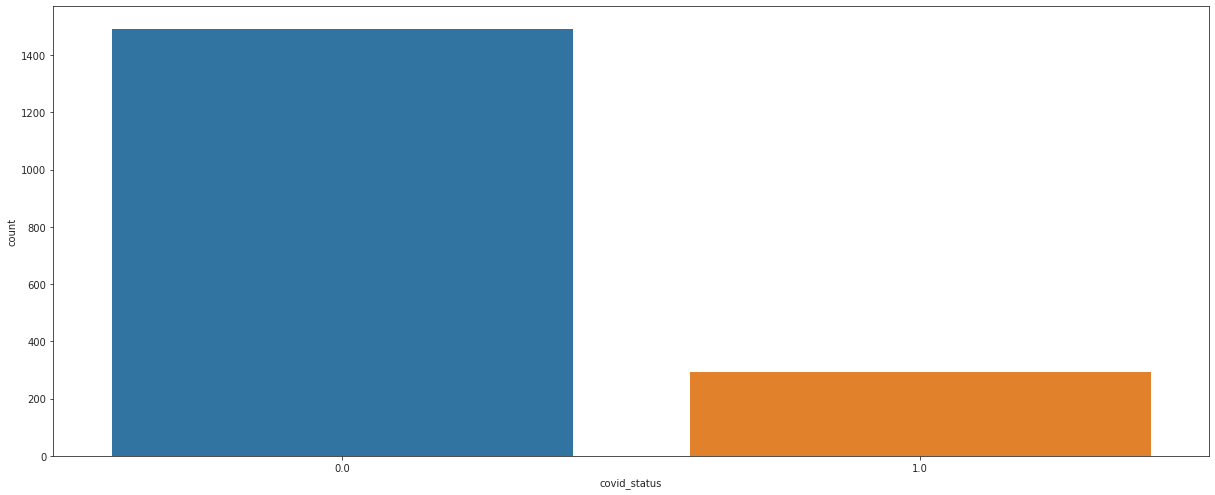

In [8]:
#Show newly mapped label
a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot('covid_status',ax=ax, data =df)


In [9]:
#Drop missing Data
df.dropna(axis=0, inplace=True)
print(df.isnull().sum())
print('\n')

#Unique values
print("2. Unique values per atribute")
for col in df.columns:
  print(col, ':' , len(df[col].unique()), 'class')

a               0
g               0
l_c             0
l_s             0
covid_status    0
dtype: int64


2. Unique values per atribute
a : 78 class
g : 3 class
l_c : 43 class
l_s : 132 class
covid_status : 2 class





*   MultiColumnLabelEncoder method transforms strings into label encoded representation.


In [10]:
#Method for Encoding Features
  
 
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode
 
    def fit(self,X,y=None):
        return self 
 
    def transform(self,X):
        
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output
 
    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)  
 
#Calling method
MultiColumnLabelEncoder(columns = ["g","l_c","l_s"]).fit_transform(df)

,a,g,l_c,l_s,covid_status
0,28,1,15,10,0.0
1,25,1,15,70,0.0
2,28,0,41,102,0.0
3,26,1,15,70,0.0
4,32,1,15,20,0.0
...,...,...,...,...,...
1942,48,1,15,113,1.0
1943,36,1,15,70,1.0
1944,76,1,15,113,1.0
1945,25,1,15,113,1.0


In [11]:
#Converting all datatype into float32
df = pd.DataFrame({col: df[col].astype('category').cat.codes.astype('float32') for col in df}, index=df.index)
print(df.dtypes)
print("/")
 
df.head()

a               float32
g               float32
l_c             float32
l_s             float32
covid_status    float32
dtype: object
/


,a,g,l_c,l_s,covid_status
0,22.0,1.0,15.0,10.0,0.0
1,19.0,1.0,15.0,70.0,0.0
2,22.0,0.0,41.0,102.0,0.0
3,20.0,1.0,15.0,70.0,0.0
4,26.0,1.0,15.0,20.0,0.0


#Model Building and Evaluating

In [12]:
#Splitting data into train test 
X_train, X_test, y_train, y_test = train_test_split(scale(df.drop('covid_status', axis = 1)),df['covid_status'], test_size = 0.33, random_state = 178)

#One hot for two neuron
y_train = np_utils.to_categorical(y_train) 

In [13]:
#Defining neural network model
model = Sequential()
 
#one Input layer with 12 Neurons
model.add(Dense(12, input_dim = 4, activation='relu') )
 
#one Hidden Layer with 4 Neurons
model.add(Dense(4, activation='relu') )
 
#one Output layer with 2 Neurons
model.add(Dense(2, activation='sigmoid'))
 
#Compiling model
model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
 
#Training the model
model.fit(X_train, y_train, epochs = 100, batch_size=300)

Epoch 1/100
4/4 [==============================] - 13s 4ms/step - loss: 0.6803 - accuracy: 0.5951
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.6217
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6838
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.7108
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6477 - accuracy: 0.7744
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6363 - accuracy: 0.8038
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6269 - accuracy: 0.8197
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6218 - accuracy: 0.8209
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6176 - accuracy: 0.8224
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6053 - accuracy: 0.8259
Epoch 11/100
4/4 [==========

In [14]:
#Prediction
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Evaluation
accuracy_score(y_test, y_pred)

0.8578680203045685

**Finally, The Accuracy score is upto 85%**

# About Applicant

*   Internshala Name: Taufiqul Haque Khan Tusar
*   GitHub: https://github.com/Muhammad-Taufiq-Khan
*   Applied for: Deep Learning Research internship at Pucho Life Sciences Incorporation.






